In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import joblib

In [23]:
# ganti dengan encoding lain seperti 'ISO-8859-1' atau 'latin1'
dataset = pd.read_csv('dataset.csv', encoding='utf-16', sep=r'\s*,\s*', engine='python', quotechar='"')

dataset.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Extra']


In [24]:
print(dataset.head())
print(dataset.shape)


                Date     Open     High      Low    Close  Volume Extra
0  "2022.07.12 09:20  0.98408  0.98427  0.98359  0.98390     462    0"
1  "2022.07.12 09:25  0.98389  0.98422  0.98355  0.98412     454    0"
2  "2022.07.12 09:30  0.98413  0.98451  0.98363  0.98390     581    0"
3  "2022.07.12 09:35  0.98390  0.98428  0.98370  0.98423     540    0"
4  "2022.07.12 09:40  0.98423  0.98442  0.98406  0.98417     477    0"
(100014, 7)


In [25]:
data = dataset['Close'].values
data = data.reshape(-1, 1)


In [26]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [27]:
joblib.dump(scaler, 'scaler_ta_abel1.save')

['scaler_ta_abel1.save']

In [28]:
def create_dataset(data, time_step=1, steps_ahead=5):
    X, Y = [], []
    for i in range(len(data) - time_step - steps_ahead):
        X.append(data[i:(i + time_step), 0])  # Urutan 20 timestep untuk input
        Y.append(data[(i + time_step):(i + time_step + steps_ahead), 0])  # Urutan 5 timestep sebagai output
    return np.array(X), np.array(Y)

time_step = 20
steps_ahead = 5
X, Y = create_dataset(scaled_data, time_step, steps_ahead)


In [29]:
# Bentuk X sudah (samples, timesteps, 1), tidak perlu diubah
# Bentuk Y harus (samples, 5) karena kita memprediksi 5 timestep ke depan
X = X.reshape(X.shape[0], X.shape[1], 1)  # Bentuk (samples, timesteps, features)
Y = Y.reshape(Y.shape[0], steps_ahead)  # Bentuk (samples, steps_ahead)


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


In [31]:
print("Shape of X_train:", X_train.shape)
print("First 5 samples of X_train:", X_train[:5])
print("First 5 samples of Y_train:", Y_train[:5])


Shape of X_train: (79991, 20, 1)
First 5 samples of X_train: [[[0.80712446]
  [0.80850663]
  [0.80712446]
  [0.80919771]
  [0.80882076]
  [0.80794119]
  [0.80963749]
  [0.80882076]
  [0.80970032]
  [0.81127097]
  [0.81246466]
  [0.81390966]
  [0.81171075]
  [0.80900924]
  [0.80831815]
  [0.80970032]
  [0.81057988]
  [0.81045423]
  [0.81070553]
  [0.80856945]]

 [[0.80850663]
  [0.80712446]
  [0.80919771]
  [0.80882076]
  [0.80794119]
  [0.80963749]
  [0.80882076]
  [0.80970032]
  [0.81127097]
  [0.81246466]
  [0.81390966]
  [0.81171075]
  [0.80900924]
  [0.80831815]
  [0.80970032]
  [0.81057988]
  [0.81045423]
  [0.81070553]
  [0.80856945]
  [0.80869511]]

 [[0.80712446]
  [0.80919771]
  [0.80882076]
  [0.80794119]
  [0.80963749]
  [0.80882076]
  [0.80970032]
  [0.81127097]
  [0.81246466]
  [0.81390966]
  [0.81171075]
  [0.80900924]
  [0.80831815]
  [0.80970032]
  [0.81057988]
  [0.81045423]
  [0.81070553]
  [0.80856945]
  [0.80869511]
  [0.81164792]]

 [[0.80919771]
  [0.80882076]
  [

In [32]:
print(dataset.isnull().sum())
print(dataset.head())


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Extra     0
dtype: int64
                Date     Open     High      Low    Close  Volume Extra
0  "2022.07.12 09:20  0.98408  0.98427  0.98359  0.98390     462    0"
1  "2022.07.12 09:25  0.98389  0.98422  0.98355  0.98412     454    0"
2  "2022.07.12 09:30  0.98413  0.98451  0.98363  0.98390     581    0"
3  "2022.07.12 09:35  0.98390  0.98428  0.98370  0.98423     540    0"
4  "2022.07.12 09:40  0.98423  0.98442  0.98406  0.98417     477    0"


In [33]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=5))  # Output lay|er untuk memprediksi x nilai ke depan sesuai step ahead


d:\tugasakhirabel\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [35]:
print(dataset.isnull().sum())


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Extra     0
dtype: int64


In [36]:
model.fit(X_train, Y_train, batch_size=64, epochs=50)


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0086
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 5.0572e-05
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 4.4006e-05
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 4.4000e-05
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 3.8144e-05
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 3.7146e-05
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 3.3353e-05
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 2.6527e-05
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 2.6073e-05
Epoch 10/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 2.6559e-05
Epoch 11/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 2.2361e-05
Epoch 12/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 2.1954e-05
Epoch 13/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 1.9024e-05
Epoch 14/50
1250/1250 ━━━

In [41]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))


625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [42]:
Y_test_unscaled = scaler.inverse_transform(Y_test.reshape(-1, 1))


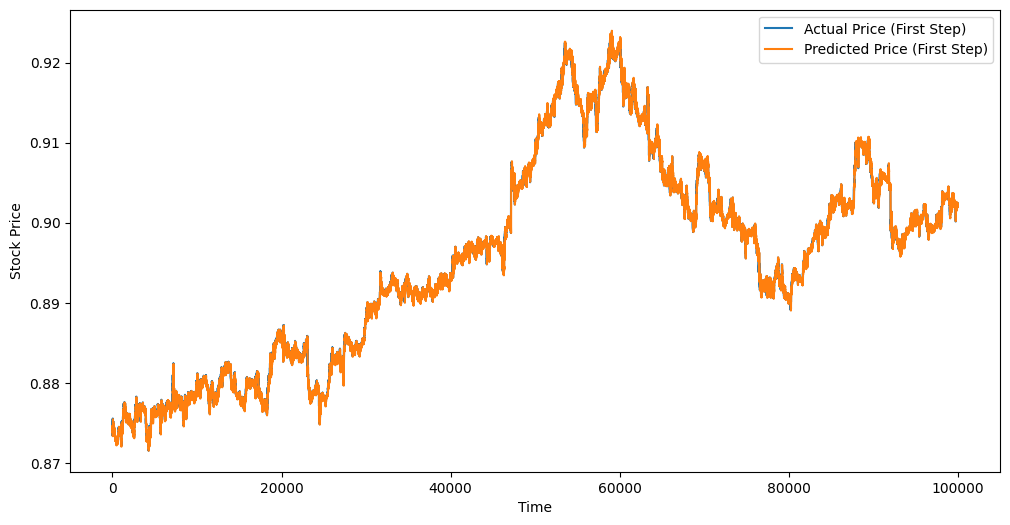

In [43]:
plt.figure(figsize=(12,6))
plt.plot(Y_test_unscaled[:, 0], label='Actual Price (First Step)')
plt.plot(predictions[:, 0], label='Predicted Price (First Step)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [44]:

model.save('lambo_lu_warna_apa_bos.h5')
print("anti rungkad bos")


mantap udah
